In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [38]:
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [39]:
bikeDF = pd.read_csv('../data/bike_train.csv')
print(bikeDF.shape)
bikeDF.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
# 문자열을 datetime 타입으로 변경
bikeDF['datetime'] = bikeDF.datetime.apply(pd.to_datetime)


# datetime 타입에서 년, 월, 일, 시간 추출
bikeDF['year'] = bikeDF.datetime.apply(lambda x:x.year)
bikeDF['month'] = bikeDF.datetime.apply(lambda x:x.month)
bikeDF['day'] = bikeDF.datetime.apply(lambda x:x.day)
bikeDF['hour'] = bikeDF.datetime.apply(lambda x:x.hour)
bikeDF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [42]:
drop_columns = ['datetime','casual','registered']
bikeDF.drop(drop_columns, axis=1, inplace=True)

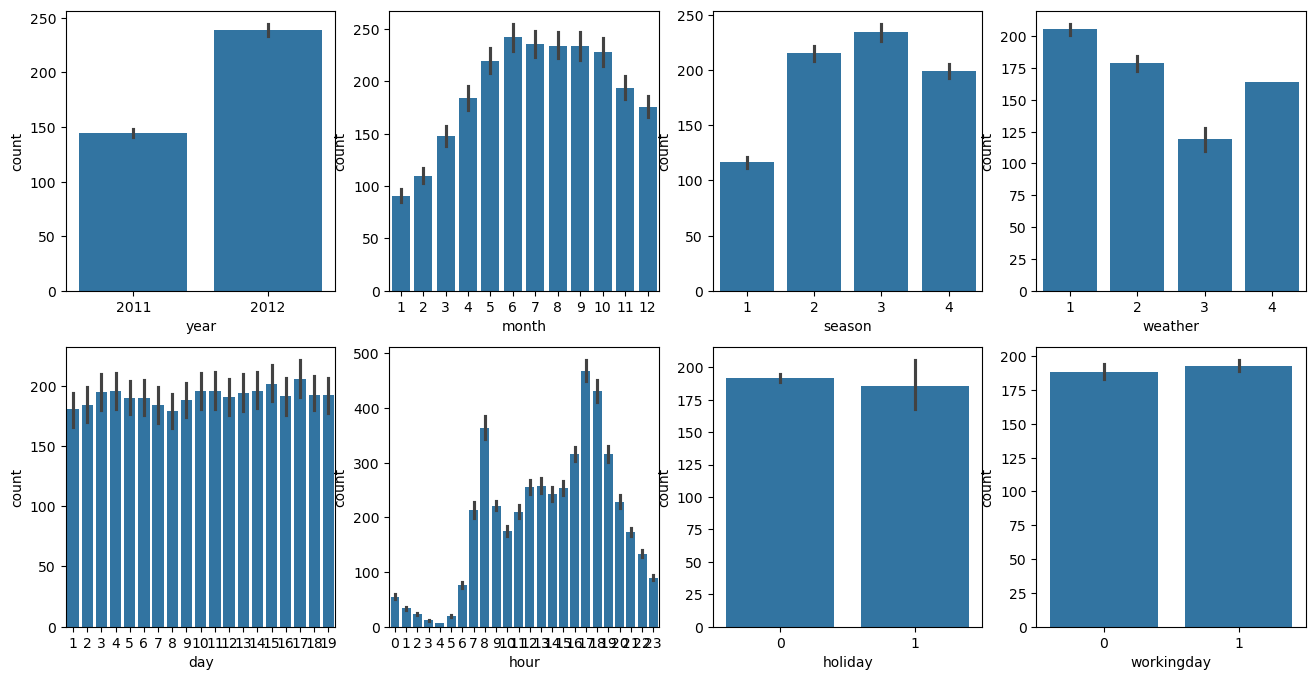

In [43]:
fig, axs = plt.subplots(figsize =(16,8), ncols=4, nrows=2)
cat_features = ['year','month','season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 컬럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y ='count', data = bikeDF, ax = axs[row][col])

In [44]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# # log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p() 이용해 RMSLE 계산
# def rmsle(y, pred):
#     y = np.where(y < 0, 0, y)
#     pred = np.where(pred < 0, 0, pred)
#     msle = mean_squared_log_error(y, pred)
#     rmsle = np.sqrt(msle)
#     return rmsle

#     # log_y = np.log1p(y)
#     # log_pred = np.log1p(pred)
#     # squared_error = (log_y - log_pred)**2
#     # rmsle = np.sqrt(np.mean(squared_error))
#     # return rmsle

# # 사이킷런의 mean_squared_error()를 이용해서 RMSE 계산
# def rmse(y,pred):
#     return np.sqrt(mean_squared_error(y, pred))

# # MAE, RMSE, RMSLM를 모두 계산
# def evaluate_regr(y, pred):
#     rmsle_val = rmsle(y, pred)
#     rmse_val = rmse(y, pred)
#     # MAE는 사이킷런의 mean_absolute_error()로 계산
#     mae_val = mean_absolute_error(y, pred)
#     print('RMSLM : {0:.3f}, RMSE : {1:.3F},MAE : {2:.3F}'. format(rmsle_val, rmse_val, mae_val))

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error

# RMSLE 계산 함수
def rmsle(y, pred):
    # 예측값과 실제값이 음수인 경우 0으로 변환
    y = np.where(y < 0, 0, y)
    pred = np.where(pred < 0, 0, pred)
    
    # RMSLE 계산
    try:
        msle = mean_squared_log_error(y, pred)
        rmsle_val = np.sqrt(msle)
    except ValueError as e:
        print(f"Error calculating RMSLE: {e}")
        rmsle_val = np.nan  # 오류 발생 시 NaN 반환
    return rmsle_val

# RMSE 계산 함수
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE 계산 함수
def evaluate_regr(y, pred):
    if (y < 0).any() or (pred < 0).any():
        print("데이터에 음수 값이 포함되어 있어 RMSLE를 계산할 수 없습니다.")
        rmsle_val = np.nan  # 음수 값이 있으면 RMSLE는 계산하지 않음
    else:
        rmsle_val = rmsle(y, pred)
    
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSLE: {rmsle_val:.3f}, RMSE: {rmse_val:.3f}, MAE: {mae_val:.3f}')



In [46]:
# 다음과 같은 rmsle 구현은 오버플로나 언더플로 오류를 발생하기 쉽습니다.
def rmsle(y, pred):
    msle = mean_squared_log_error(y, pred)
    rmsle = np.sqrt(msle)
    return rmsle

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bikeDF['count']
x_features = bikeDF.drop(['count'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_features,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=0)


In [48]:
lr_reg= LinearRegression()


In [49]:
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

In [51]:
evaluate_regr(y_test, pred)
# 이쪽부분 확인 할 것

데이터에 음수 값이 포함되어 있어 RMSLE를 계산할 수 없습니다.
RMSLE: nan, RMSE: 140.900, MAE: 105.924


In [52]:
def get_top_error_data(y_test, pred, n_tops =5):
    # DF의 컬럼으로 실제 대여(count) 횟수와 예측값을 서로 비교할 수 있도록 생성.
    resultDF = pd.DataFrame(y_test.values, columns=['real_count'])
    resultDF['predicted_count'] = np.round(pred)
    resultDF['diff'] = np.abs(resultDF['real_count'] - resultDF['predicted_count'])

# 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
    print(resultDF.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

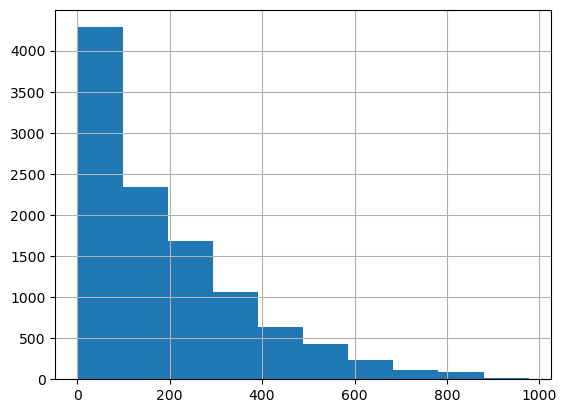

In [53]:
y_target.hist()

<Axes: >

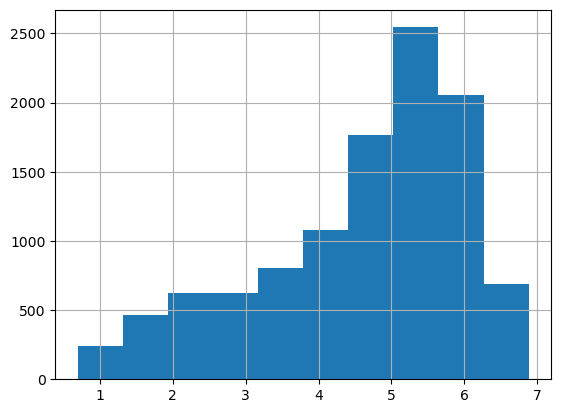

In [55]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [58]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
x_train, x_test, y_train, y_test = train_test_split(x_features,
                                                    y_target_log,
                                                    test_size=0.3,
                                                    random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변화된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: ylabel='None'>

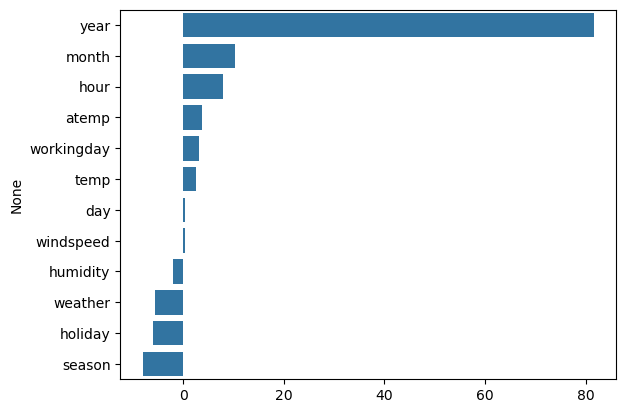

In [56]:
coef = pd.Series(lr_reg.coef_, index = x_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y= coef_sort.index)

In [57]:
# 'year','month','day','hour'등의 피처들을 One Hot Encoding
x_features_ohe = pd.get_dummies(x_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [59]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_features_ohe,
                                                    y_target_log,
                                                    test_size=0.3,
                                                    random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1= False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge= Ridge(alpha=10)
lasso_reg= Lasso(alpha=0.01)

for model in [lr_reg,ridge,lasso_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)
    

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.690, MAE: 63.383
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: ylabel='None'>

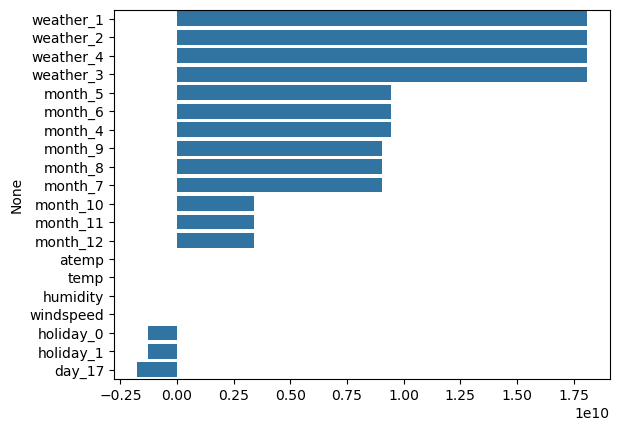

In [60]:
coef = pd.Series(lr_reg.coef_, index = x_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index) #>>>>>>>?????????? 왜다르냐?? ㅋㅋㅋㅋㅋㅋ